In [1]:
from datetime import datetime
HOMEPATH = "/home/ubuntu/fastai/"
DATA_HOME_DIR = HOMEPATH + "data/cifar-10/"
DATA_WORKING = DATA_HOME_DIR + "sample/"
DATA_WORKING_RESULTS = DATA_WORKING + "results/"

print ("DATA_WORKING      :", DATA_WORKING)
print ("DATA_WORKING_RESULTS:", DATA_WORKING_RESULTS)

('DATA_WORKING      :', '/home/ubuntu/fastai/data/cifar-10/sample/')
('DATA_WORKING_RESULTS:', '/home/ubuntu/fastai/data/cifar-10/sample/results/')


In [2]:
from keras import backend as K
from keras.models import load_model #move this to top when run complete.

import os

print("----------------")
def set_keras_backend(backend):

    if K.backend() != backend:
        os.environ['KERAS_BACKEND'] = backend
        reload(K)
        assert K.backend() == backend

set_keras_backend("theano")

Using Theano backend.
WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

Using gpu device 0: Tesla K80 (CNMeM is disabled, cuDNN 5110)


----------------


In [3]:
os.chdir(HOMEPATH)
print ("os.getcwd:", os.getcwd())
# Rather than importing everything manually, we'll make things easy
#   and load them all in utils.py, and just import them from there.
%matplotlib inline
import utils; reload(utils)
from utils import *
from utils import plots, get_batches, plot_confusion_matrix, get_data


('os.getcwd:', '/home/ubuntu/fastai')


In [4]:
os.chdir(HOMEPATH)
print ("os.getcwd:", os.getcwd())
%matplotlib inline
from __future__ import division,print_function
import os, json
from glob import glob
import numpy as np
import pandas as pd
import scipy
from random import shuffle
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
np.set_printoptions(precision=4, linewidth=100)
from matplotlib import pyplot as plt


('os.getcwd:', '/home/ubuntu/fastai')


In [5]:
from numpy.random import random, permutation
from scipy import misc, ndimage
from scipy.ndimage.interpolation import zoom

import keras
from keras import backend as K
from keras.utils.data_utils import get_file
from keras.models import Sequential
from keras.layers import Input
from keras.layers.core import Flatten, Dense, Dropout, Lambda
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD, RMSprop
from keras.preprocessing import image

from vgg16 import Vgg16

In [6]:
#path = HOMEPATH + "data/dogscats/sample/"
path = DATA_HOME_DIR 
#path = DATA_HOME_DIR + "sample/"
train_path = path + 'train/'
test_path = path + 'test/'
testUnknown_path = path + 'test/unknown/'
valid_path = path + 'valid/'
model_path = path + 'models/'
sample_path = path + 'sample/'
sampleTrain_path = path + 'sample/train/'
sampleTest_path = path + 'sample/test/'
sampleValid_path = path + 'sample/valid/'
sampleResults_path = path + 'sample/results/'
sampleTestUnknown_path = path + 'sample/test/unknown/'

categories = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


batch_size=64

In [7]:
def dirFileList(dir_path):
    return [name for name in os.listdir(dir_path) if os.path.isfile(os.path.join(dir_path, name))]


In [8]:
dirList = [train_path, valid_path, sampleTrain_path, sampleValid_path]

for dir_path in dirList:
    for category in categories:
        print ("# of files in", dir_path+category, ":", len(dirFileList(dir_path+category)))

# of files in /home/ubuntu/fastai/data/cifar-10/train/airplane : 3200
# of files in /home/ubuntu/fastai/data/cifar-10/train/automobile : 3200
# of files in /home/ubuntu/fastai/data/cifar-10/train/bird : 3200
# of files in /home/ubuntu/fastai/data/cifar-10/train/cat : 3200
# of files in /home/ubuntu/fastai/data/cifar-10/train/deer : 3200
# of files in /home/ubuntu/fastai/data/cifar-10/train/dog : 3200
# of files in /home/ubuntu/fastai/data/cifar-10/train/frog : 3200
# of files in /home/ubuntu/fastai/data/cifar-10/train/horse : 3200
# of files in /home/ubuntu/fastai/data/cifar-10/train/ship : 3200
# of files in /home/ubuntu/fastai/data/cifar-10/train/truck : 3200
# of files in /home/ubuntu/fastai/data/cifar-10/valid/airplane : 800
# of files in /home/ubuntu/fastai/data/cifar-10/valid/automobile : 800
# of files in /home/ubuntu/fastai/data/cifar-10/valid/bird : 800
# of files in /home/ubuntu/fastai/data/cifar-10/valid/cat : 800
# of files in /home/ubuntu/fastai/data/cifar-10/valid/deer : 

In [9]:
vgg = Vgg16()
model = vgg.model
print ("type(vgg):", type(vgg))
print ("type(model):", type(model))

type(vgg): <type 'instance'>
type(model): <class 'keras.models.Sequential'>


In [10]:
def showLayersInfo(model):
    print ("Number of layers : ", len(model.layers))
    for layer in model.layers:
        print (type(layer))

In [11]:
showLayersInfo(model)

Number of layers :  38
<class 'keras.layers.core.Lambda'>
<class 'keras.layers.convolutional.ZeroPadding2D'>
<class 'keras.layers.convolutional.Convolution2D'>
<class 'keras.layers.convolutional.ZeroPadding2D'>
<class 'keras.layers.convolutional.Convolution2D'>
<class 'keras.layers.pooling.MaxPooling2D'>
<class 'keras.layers.convolutional.ZeroPadding2D'>
<class 'keras.layers.convolutional.Convolution2D'>
<class 'keras.layers.convolutional.ZeroPadding2D'>
<class 'keras.layers.convolutional.Convolution2D'>
<class 'keras.layers.pooling.MaxPooling2D'>
<class 'keras.layers.convolutional.ZeroPadding2D'>
<class 'keras.layers.convolutional.Convolution2D'>
<class 'keras.layers.convolutional.ZeroPadding2D'>
<class 'keras.layers.convolutional.Convolution2D'>
<class 'keras.layers.convolutional.ZeroPadding2D'>
<class 'keras.layers.convolutional.Convolution2D'>
<class 'keras.layers.pooling.MaxPooling2D'>
<class 'keras.layers.convolutional.ZeroPadding2D'>
<class 'keras.layers.convolutional.Convolutio

In [12]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lambda_1 (Lambda)                (None, 3, 224, 224)   0           lambda_input_1[0][0]             
____________________________________________________________________________________________________
zeropadding2d_1 (ZeroPadding2D)  (None, 3, 226, 226)   0           lambda_1[0][0]                   
____________________________________________________________________________________________________
convolution2d_1 (Convolution2D)  (None, 64, 224, 224)  1792        zeropadding2d_1[0][0]            
____________________________________________________________________________________________________
zeropadding2d_2 (ZeroPadding2D)  (None, 64, 226, 226)  0           convolution2d_1[0][0]            
___________________________________________________________________________________________

In [20]:
# Use batch size of 1 since we're just doing preprocessing on the CPU
startTime= datetime.now()
print ("startTime:", startTime)
val_batches = get_batches(DATA_WORKING+'valid/', shuffle=False, batch_size=batch_size)
timeElapsed=datetime.now()-startTime
print('val_batches: Time elapsed (hh:mm:ss.ms) {}'.format(timeElapsed))

print ("\n")

startTime= datetime.now()
print ("startTime:", startTime)
batches     = get_batches(DATA_WORKING+'train/', shuffle=False, batch_size=batch_size)
timeElapsed=datetime.now()-startTime
print('batches : Time elapsed (hh:mm:ss.ms) {}'.format(timeElapsed))


startTime: 2017-12-10 23:07:24.773923
Found 2000 images belonging to 10 classes.
val_batches: Time elapsed (hh:mm:ss.ms) 0:00:00.043575


startTime: 2017-12-10 23:07:24.817869
Found 8000 images belonging to 10 classes.
batches : Time elapsed (hh:mm:ss.ms) 0:00:00.164641


In [21]:
print("DATA_WORKING:", DATA_WORKING)

DATA_WORKING: /home/ubuntu/fastai/data/cifar-10/sample/


In [22]:
#Keras returns *classes* as a single column, so we convert to one hot encoding
def onehot(x): 
    return np.array(OneHotEncoder().fit_transform(x.reshape(-1,1)).todense())

In [47]:
val_classes = val_batches.classes
trn_classes = batches.classes
print ("val_classes:", type(val_classes), val_classes.shape, "uniques:", np.unique(val_classes))
print("val_classes[0:10]:", val_classes[0:10])
print ("trn_classes:", type(trn_classes), trn_classes.shape, "uniques:", np.unique(val_classes))
print("trn_classes[0:10]:", trn_classes[0:10])
val_labels = onehot(val_classes)
trn_labels = onehot(trn_classes)
print ("after onehot conversion.")
print ("val_labels:", val_labels.shape, val_labels[0])
print ("trn_labels:", trn_labels.shape, trn_labels[0])

val_classes: <type 'numpy.ndarray'> (2000,) uniques: [0 1 2 3 4 5 6 7 8 9]
val_classes[0:10]: [0 0 0 0 0 0 0 0 0 0]
trn_classes: <type 'numpy.ndarray'> (8000,) uniques: [0 1 2 3 4 5 6 7 8 9]
trn_classes[0:10]: [0 0 0 0 0 0 0 0 0 0]
after onehot conversion.
val_labels: (2000, 10) [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
trn_labels: (8000, 10) [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


In [24]:
print ("DATA_WORKING_RESULTS:", DATA_WORKING_RESULTS)
print (DATA_WORKING_RESULTS+'train_data.bc')
trn_data = load_array(DATA_WORKING_RESULTS+'train_data.bc')
val_data = load_array(DATA_WORKING_RESULTS+'valid_data.bc')
print ("trn_data:", type(trn_data), trn_data.shape)#should return trn_data: <type 'numpy.ndarray'> (8000, 3, 224, 224)
print ("val_data:", type(val_data), val_data.shape)#should return val_data: <type 'numpy.ndarray'> (2000, 3, 224, 224)


DATA_WORKING_RESULTS: /home/ubuntu/fastai/data/cifar-10/sample/results/
/home/ubuntu/fastai/data/cifar-10/sample/results/train_data.bc
trn_data: <type 'numpy.ndarray'> (8000, 3, 224, 224)
val_data: <type 'numpy.ndarray'> (2000, 3, 224, 224)


In [27]:
filenames = val_batches.filenames
print ("filenames:", type(filenames), len(filenames))
print (filenames[0:5])

filenames: <type 'list'> 2000
['airplane/28450.png', 'airplane/35856.png', 'airplane/26724.png', 'airplane/16514.png', 'airplane/36622.png']


In [28]:
vgg.model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lambda_1 (Lambda)                (None, 3, 224, 224)   0           lambda_input_1[0][0]             
____________________________________________________________________________________________________
zeropadding2d_1 (ZeroPadding2D)  (None, 3, 226, 226)   0           lambda_1[0][0]                   
____________________________________________________________________________________________________
convolution2d_1 (Convolution2D)  (None, 64, 224, 224)  1792        zeropadding2d_1[0][0]            
____________________________________________________________________________________________________
zeropadding2d_2 (ZeroPadding2D)  (None, 64, 226, 226)  0           convolution2d_1[0][0]            
___________________________________________________________________________________________

In [29]:
print ("before pop, # of layers:", len(model.layers))
model.pop()
print ("after pop, # of layers:", len(model.layers))
for layer in model.layers: layer.trainable=False

before pop, # of layers: 38
after pop, # of layers: 37


In [30]:
print (type(vgg.model))


<class 'keras.models.Sequential'>


In [31]:
vgg.model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lambda_1 (Lambda)                (None, 3, 224, 224)   0           lambda_input_1[0][0]             
____________________________________________________________________________________________________
zeropadding2d_1 (ZeroPadding2D)  (None, 3, 226, 226)   0           lambda_1[0][0]                   
____________________________________________________________________________________________________
convolution2d_1 (Convolution2D)  (None, 64, 224, 224)  1792        zeropadding2d_1[0][0]            
____________________________________________________________________________________________________
zeropadding2d_2 (ZeroPadding2D)  (None, 64, 226, 226)  0           convolution2d_1[0][0]            
___________________________________________________________________________________________

In [32]:
model.add(Dense(10, activation='softmax'))#NB: Dense requires 10 because 10 categories.

In [33]:
print ("after adding dense layer, # of layers:", len(model.layers))

after adding dense layer, # of layers: 38


In [34]:
vgg.model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lambda_1 (Lambda)                (None, 3, 224, 224)   0           lambda_input_1[0][0]             
____________________________________________________________________________________________________
zeropadding2d_1 (ZeroPadding2D)  (None, 3, 226, 226)   0           lambda_1[0][0]                   
____________________________________________________________________________________________________
convolution2d_1 (Convolution2D)  (None, 64, 224, 224)  1792        zeropadding2d_1[0][0]            
____________________________________________________________________________________________________
zeropadding2d_2 (ZeroPadding2D)  (None, 64, 226, 226)  0           convolution2d_1[0][0]            
___________________________________________________________________________________________

In [35]:
print ("# of layers:", len(model.layers))
for layer in model.layers:
    print (type(layer))

# of layers: 38
<class 'keras.layers.core.Lambda'>
<class 'keras.layers.convolutional.ZeroPadding2D'>
<class 'keras.layers.convolutional.Convolution2D'>
<class 'keras.layers.convolutional.ZeroPadding2D'>
<class 'keras.layers.convolutional.Convolution2D'>
<class 'keras.layers.pooling.MaxPooling2D'>
<class 'keras.layers.convolutional.ZeroPadding2D'>
<class 'keras.layers.convolutional.Convolution2D'>
<class 'keras.layers.convolutional.ZeroPadding2D'>
<class 'keras.layers.convolutional.Convolution2D'>
<class 'keras.layers.pooling.MaxPooling2D'>
<class 'keras.layers.convolutional.ZeroPadding2D'>
<class 'keras.layers.convolutional.Convolution2D'>
<class 'keras.layers.convolutional.ZeroPadding2D'>
<class 'keras.layers.convolutional.Convolution2D'>
<class 'keras.layers.convolutional.ZeroPadding2D'>
<class 'keras.layers.convolutional.Convolution2D'>
<class 'keras.layers.pooling.MaxPooling2D'>
<class 'keras.layers.convolutional.ZeroPadding2D'>
<class 'keras.layers.convolutional.Convolution2D'>
<

In [36]:
layers = model.layers
# Get the index of the first dense layer...
first_dense_idx = [index for index,layer in enumerate(layers) if type(layer) is Dense][0]
print (type(first_dense_idx), first_dense_idx)
# ...and set this and all subsequent layers to trainable
for layer in layers[first_dense_idx:]: 
    layer.trainable=True

<type 'int'> 33


In [38]:
opt = RMSprop(lr=0.1)

In [39]:
for layer in layers[12:]: layer.trainable=True
K.set_value(opt.lr, 0.001)

In [40]:
model.load_weights(DATA_WORKING_RESULTS+'finetune3.h5')

In [ ]:
def fit_model(model, batches, val_batches, nb_epoch=1):
    model.fit_generator(batches, 
                        samples_per_epoch=batches.n, 
                        nb_epoch=nb_epoch, 
                        validation_data=val_batches, 
                        nb_val_samples=val_batches.n)

In [41]:
opt = RMSprop(lr=0.1)
#https://keras.io/optimizers/#rmsprop
#This optimizer is usually a good choice for recurrent neural networks.
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [42]:
preds = model.predict_classes(val_data, batch_size=batch_size)
probs = model.predict_proba(val_data, batch_size=batch_size)

2000/2000 [==============================] - 48s    


In [50]:
print (type(preds), preds.shape,  ", unique:", np.unique(preds), preds[0:5])
print (type(probs), probs.shape)
print ("probs\n", probs[0:5, ],)

preds_wide = onehot(preds)
print ("preds_wide\n", preds_wide.shape, preds_wide[0:5, ])

<type 'numpy.ndarray'> (2000,) , unique: [1 3 6] [1 1 6 6 1]
<type 'numpy.ndarray'> (2000, 10)
probs
 [[  0.0000e+00   1.0000e+00   0.0000e+00   0.0000e+00   0.0000e+00   0.0000e+00   0.0000e+00
    0.0000e+00   0.0000e+00   0.0000e+00]
 [  0.0000e+00   1.0000e+00   0.0000e+00   0.0000e+00   0.0000e+00   0.0000e+00   0.0000e+00
    0.0000e+00   0.0000e+00   0.0000e+00]
 [  0.0000e+00   0.0000e+00   0.0000e+00   0.0000e+00   0.0000e+00   0.0000e+00   1.0000e+00
    0.0000e+00   0.0000e+00   0.0000e+00]
 [  0.0000e+00   8.1127e-25   0.0000e+00   0.0000e+00   0.0000e+00   0.0000e+00   1.0000e+00
    0.0000e+00   0.0000e+00   0.0000e+00]
 [  0.0000e+00   1.0000e+00   0.0000e+00   0.0000e+00   0.0000e+00   0.0000e+00   0.0000e+00
    0.0000e+00   0.0000e+00   0.0000e+00]]
preds_wide
 (2000, 3) [[ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 0.  0.  1.]
 [ 0.  0.  1.]
 [ 1.  0.  0.]]


[[  0 157   0   0   0   0  43   0   0   0]
 [  0 180   0   0   0   0  20   0   0   0]
 [  0  55   0   1   0   0 144   0   0   0]
 [  0  67   0   0   0   0 133   0   0   0]
 [  0  37   0   0   0   0 163   0   0   0]
 [  0  47   0   0   0   0 153   0   0   0]
 [  0  24   0   0   0   0 176   0   0   0]
 [  0 120   0   0   0   0  80   0   0   0]
 [  0 155   0   1   0   0  44   0   0   0]
 [  0 191   0   0   0   0   9   0   0   0]]


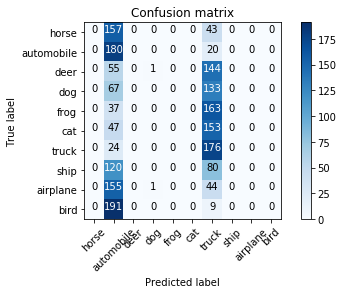

In [51]:
cm = confusion_matrix(val_classes, preds)
plot_confusion_matrix(cm, val_batches.class_indices)
